In [1]:
import numpy as np
import xarray as xr
from modules.ADI import ADI
from modules.integrator import forward_euler_final
from modules.classes import Quantity2D, Analytic
from modules.tests import plot_mass_conservation
import matplotlib.pyplot as plt

# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: x*y)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)

In [2]:
diffusion = Analytic(lambda x, y: 1)
diffusion.set_partial_x(lambda x, y: 0)
diffusion.set_partial_y(lambda x, y: 0)

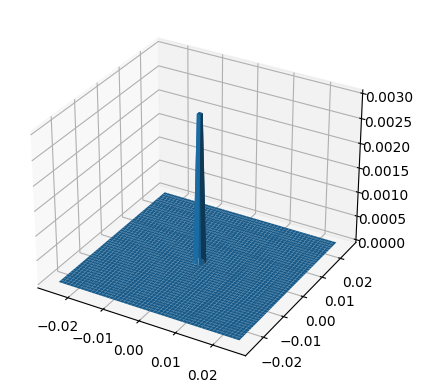

In [3]:
n_grid = 50
n_time = 400
dt = 0.0001
dx = 0.001
dy = 0.001

conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  100*np.exp(- (X**2 + Y**2)/(0.000001*dx*n_grid))
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [4]:
result_ds = forward_euler_final(conc, diffusion, initial_condition)
result_ds

ValueError: operands could not be broadcast together with shapes (48,48) (48,50) 